# 1. Preparation and Overview
### Business Case
Class to predict: Target (Dropout, Enrolled, Graduate)

Dataset Source: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

This data set was made with the intention to predict and prevent studen dropouts and failures in higher education. The data contains basic information about the student and their parents, including socio-economic and demographic information. Our model aims to predict whether a student will **dropout**, **continue enrollment**, or **graduate** from their program.

Using this data, we aim to identify factors that may be correlated to an increased probability of a student dropping out and/or failing out of college or university. It would also be useful to identify which factors may indicate a higher probability of student success. If the factors are something in the student's control, these results can be used by employees in higher education to help students who may be at a higher risk of leaving higher education prematurely. The results could also be used by various non-profits and tutoring companies to aid students who are high risk.

Colleges and universities could use this data to increase retention rates. SMU, specifically the Lyle School of Engineering, could utilize this data to make efforts in The Recruitment and Retention Office more effective.

This model will be most useful if it is deployed and frequently retrained. If we're able to collect more data as time goes on, we may notice different trends in which variables tend to be stronger indicators of a student's target status. For example, if the inflation rate is high certain years, that may be a strong predictor of the studen'ts target, but if inflation has decreased, other variables may be more important when determining the student's status. The model should be consistently retrained to keep it as up to date and as accurate as possible.

Measure of Reliability
https://ieeexplore.ieee.org/document/10056943

In this article, the researchers sought to predict student performance in higher education. In the literature review section, they referenced multiple other studies that had been done using machine learning. A few of those descriptions included the accuracy of the prediciton models used; in the first, the accuracy was 76.37-82.39%, and on the second, there was an accuracy of 74%. Based on these results, our prediction algorithm should have an accuracy of 75% or greater to be on par with other pre-existing machine learning models.

### Data Definition and Preparation
We removed the following features from the dataset: 
- **Application mode**- This variable indicated how the student applied to the school/course. This likely does not have an impact on the target variable, particularly when there are more significant variables in the dataset, so we removed it.
- **Application order**- This variable indicated how the applicant ranked their school/course choices, with 0 being their first choice and 9 being their last choice. This could potentially play a role in indicating the target variable, but other factors will likely have a more significant impact.
- **Curricular units 1st sem (credited), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (without evaluations)**- We decided that these variables were safe to be removed because we kept the enrolled curricular units and their respective grades.
- **Age at enrollment**- Other variables can give us similar information to this one. Things like marital status can be an indicator of age, and will likely have more of a weight on the student's status than their age.

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('data.csv')

#remove unwanted columns
drop_columns = ['Application mode', 'Application order','Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)', 'Age at enrollment']
df = df.drop(drop_columns, axis=1)

# df.head()

# df.info()

print(f"Original DF: {df}")

# Select the columns that are of type "Object"
target_col = df.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False)

# One hot encode the selected columns using scikit-learn's built in OneHotEncoder function
one_hot_encoded = encoder.fit_transform(df[target_col])

# Create pandas DF with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(target_col))

# Combine original DF with one-hot encoded DF
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Remove the original categorical columns
df_encoded = df_encoded.drop(target_col, axis=1)

# Print the final encoded DF
print(f"Encoded DF: {df_encoded}")

attr_des = pd.DataFrame()
attr_des['Features'] = df_encoded.columns

# Description taken directly from dataset website https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
attr_des['Description'] = [ # Marital status
                            '1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated',
                            # Course
                           '33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)',
                            # Daytime/evening attendance
                            '1 – daytime 0 - evening',
                            # Previous qualification
                            '1 - Secondary education 2 - Higher education - bachelors degree 3 - Higher education - degree 4 - Higher education - masters 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)',
                            # Previous qualification (grade)
                            'Grade of previous qualification (between 0 and 200)',
                            # Nacionality
                            '1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian',
                            # Mother's qualification
                            '1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor''s Degree 3 - Higher Education - Degree 4 - Higher Education - Master''s 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can''t read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)',
                            # Father's qualification
                            '1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor''s Degree 3 - Higher Education - Degree 4 - Higher Education - Master''s 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can''t read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)',
                            # Mother's occupation
                            '0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants',
                            # Father's occupation
                            '0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers',
                            # Admission grade
                            'Admission grade (between 0 and 200)',
                            # Displaced
                            '1 – yes 0 – no',
                            # Educational special needs
                            '1 – yes 0 – no',
                            # Debtor
                            '1 – yes 0 – no',
                            # Tuition fees up to date
                            '1 - yes 0 - no',
                            # Gender
                            '1 – male 0 – female',
                            # Scholarship holder
                            '1 – yes 0 – no',
                            # International
                            '1 – yes 0 – no',
                            # Curricular units enrolled 1st semester
                            'Number of curricular units enrolled in the 1st semester',
                            # Curricular units 1st sem (grade)
                            'Grade average in the 1st semester (between 0 and 20)',
                            # Curricular units enrolled 2nd semester
                            'Number of curricular units enrolled in the 2nd semester',
                            # Curricular untis 2nd sem (grade)
                            'Grade average in the 2nd semester (between 0 and 20)',
                            # Unemployment rate
                            'Unemployment rate %',
                            # Inflation rate
                            'Inflation rate %',
                            # GDP
                            'GDP',
                            # Target_Dropout
                            '1 – yes 0 – no',
                            # Target_Enrolled
                            '1 – yes 0 – no',
                            # Target_Graduate
                            '1 – yes 0 – no'
                            ]
attr_des['Type'] = ['Nominal','Nominal','Nominal','Nominal','Numeric', 'Nominal','Nominal','Nominal','Nominal','Nominal','Numeric','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric','Nominal', 'Nominal', 'Nominal']
attr_des['Continous/Discrete'] = ['Discrete','Discrete','Discrete','Discrete','Continuous','Discrete','Discrete','Discrete','Discrete','Discrete','Continous','Discrete','Discrete','Discrete','Discrete','Discrete', 'Discrete','Discrete','Continous','Continous','Continous','Continous','Continuous', 'Continuous','Continuous','Discrete', 'Discrete', 'Discrete']

attr_des


Original DF:       Marital status  Course  Daytime/evening attendance\t  \
0                  1     171                             1   
1                  1    9254                             1   
2                  1    9070                             1   
3                  1    9773                             1   
4                  2    8014                             0   
...              ...     ...                           ...   
4419               1    9773                             1   
4420               1    9773                             1   
4421               1    9500                             1   
4422               1    9147                             1   
4423               1    9773                             1   

      Previous qualification  Previous qualification (grade)  Nacionality  \
0                          1                           122.0            1   
1                          1                           160.0            1   
2          

,Features,Description,Type,Continous/Discrete
0,Marital status,1 – single 2 – married 3 – widower 4 – divorce...,Nominal,Discrete
1,Course,33 - Biofuel Production Technologies 171 - Ani...,Nominal,Discrete
2,Daytime/evening attendance\t,1 – daytime 0 - evening,Nominal,Discrete
3,Previous qualification,1 - Secondary education 2 - Higher education -...,Nominal,Discrete
4,Previous qualification (grade),Grade of previous qualification (between 0 and...,Numeric,Continuous
5,Nacionality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,Nominal,Discrete
6,Mother's qualification,1 - Secondary Education - 12th Year of Schooli...,Nominal,Discrete
7,Father's qualification,1 - Secondary Education - 12th Year of Schooli...,Nominal,Discrete
8,Mother's occupation,0 - Student 1 - Representatives of the Legisla...,Nominal,Discrete
9,Father's occupation,0 - Student 1 - Representatives of the Legisla...,Nominal,Discrete


c:\Users\mmthe_22\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


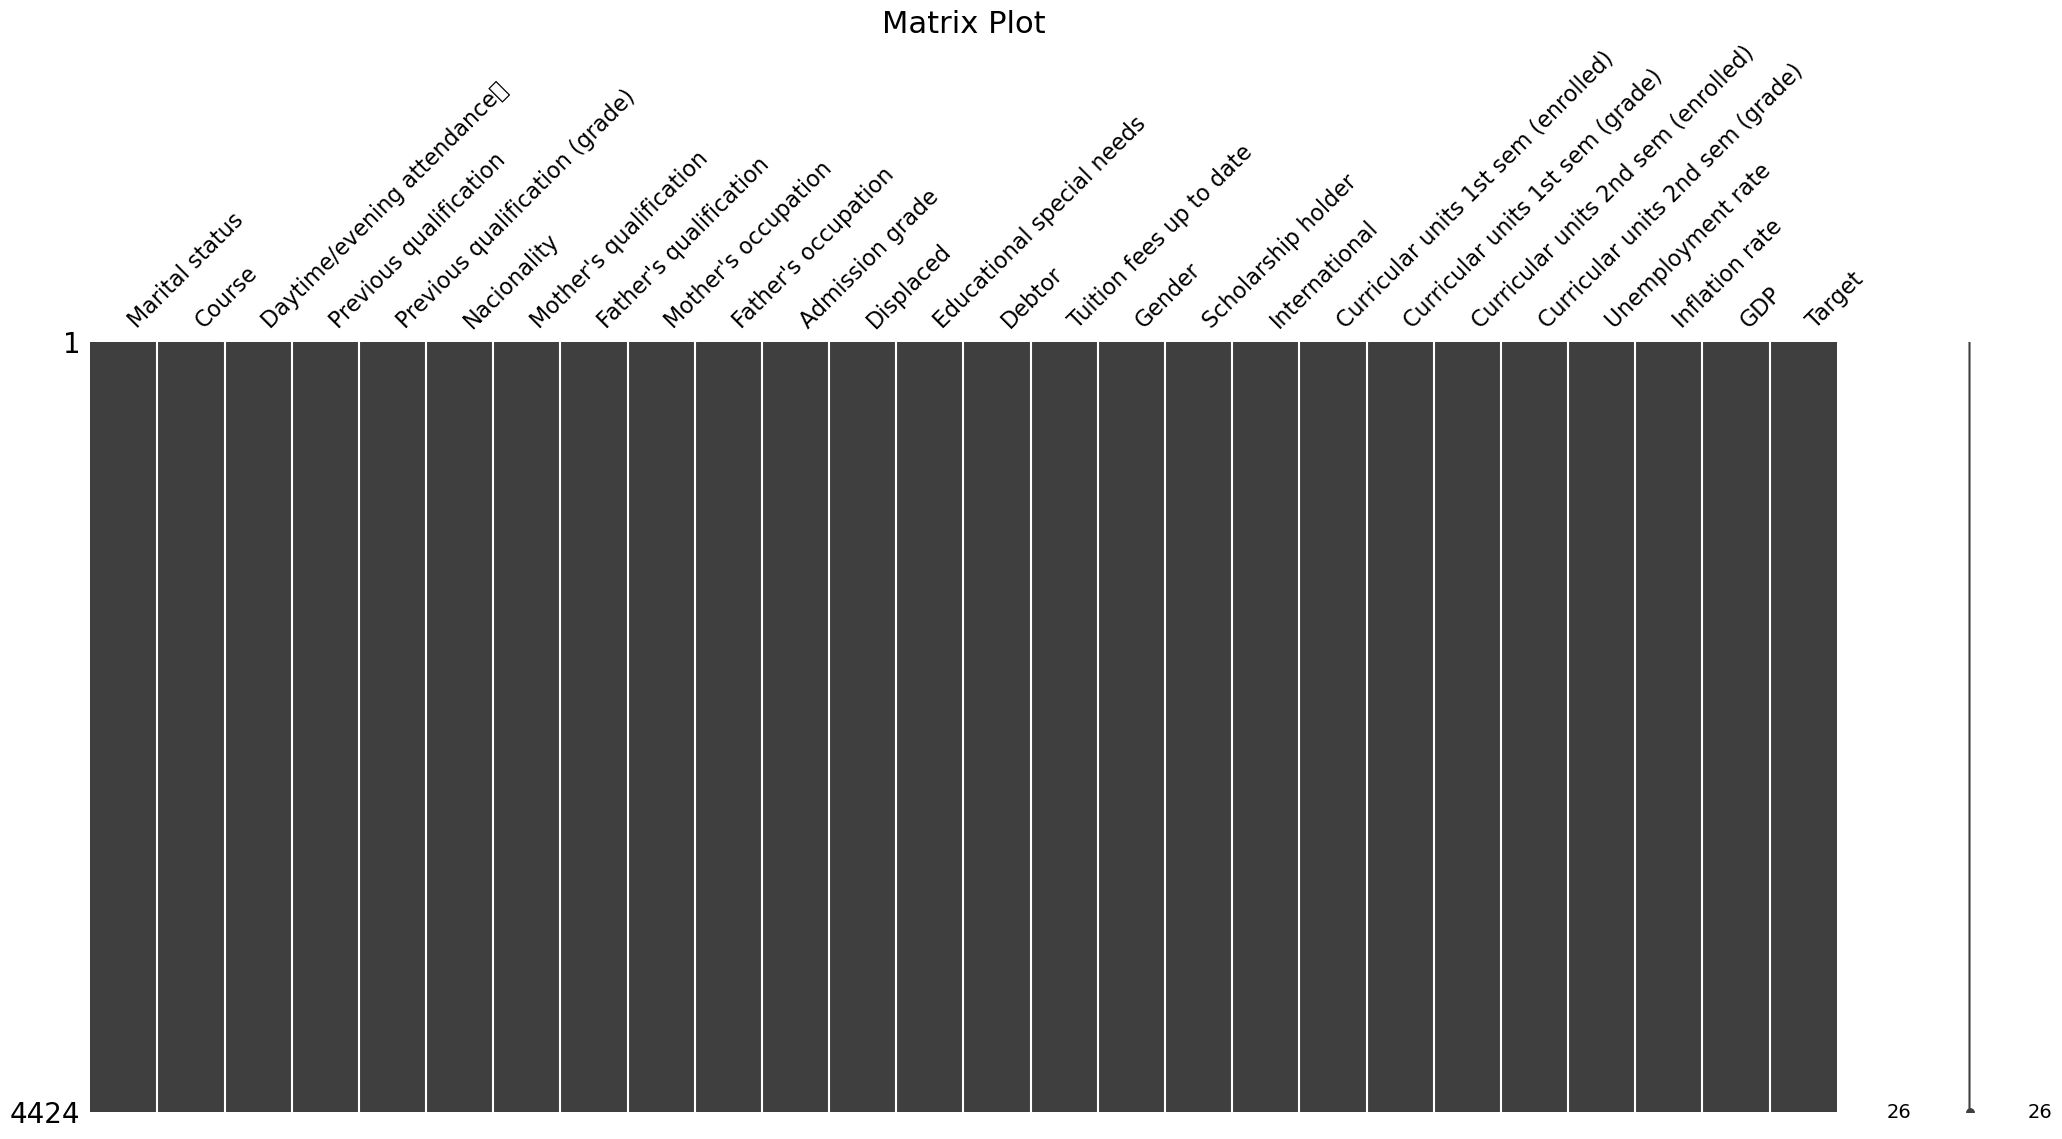

0
Empty DataFrame
Columns: [Marital status, Course, Daytime/evening attendance	, Previous qualification, Previous qualification (grade), Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, International, Curricular units 1st sem (enrolled), Curricular units 1st sem (grade), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (grade), Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 26 columns]


In [3]:
# Finding missing/duplicate data
import matplotlib.pylab as plt
import missingno as mn

mn.matrix(df)
plt.title("Matrix Plot", fontsize=22)
plt.show()

# Find the duplicate instances (excluding the first occurrence)
idx = df.duplicated()

# Find the number of duplicate instances
num_duplicates = idx.sum()  # Sum of 'True' values gives the count of duplicates

print(num_duplicates)

# Find the rows that are duplicated (excluding the first occurrence)
duplicate_rows = df[df.duplicated()]

print(duplicate_rows)

Insert breakdown of variables (mean, std, etc.) here:

In [4]:
# Divide data into training and testing splits using 80% training and 20% testing split

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_encoded, test_size=0.2)

print("Original counts")
dropout_count = df_encoded['Target_Dropout'].value_counts()[1]
print(dropout_count)

enrollment_count = df_encoded['Target_Enrolled'].value_counts()[1]
print(enrollment_count)

graduate_count = df_encoded['Target_Graduate'].value_counts()[1]
print(graduate_count)

print("Training counts")
dropout_count_train = train_data['Target_Dropout'].value_counts()[1]
print(dropout_count_train/len(train_data))

enrollment_count_train = train_data['Target_Enrolled'].value_counts()[1]
print(enrollment_count_train/len(train_data))

graduate_count_train = train_data['Target_Graduate'].value_counts()[1]
print(graduate_count_train/len(train_data))

print("Testing counts")
dropout_count_test = test_data['Target_Dropout'].value_counts()[1]
print(dropout_count_test/len(test_data))

enrollment_count_test = test_data['Target_Enrolled'].value_counts()[1]
print(enrollment_count_test/len(test_data))

graduate_count_test = test_data['Target_Graduate'].value_counts()[1]
print(graduate_count_test/len(test_data))


Original counts
1421
794
2209

Training counts
0.31845153998304604
0.17490816614862956
0.5066402938683244

Testing counts
0.33220338983050846
0.1977401129943503
0.47005649717514125


Splitting the data 80/20 works well for this dataset. The original source for this data, https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success , also used an 80/20 split when developing their model. To check the validity of the 80/20 split, we calculated the percentages of Target_Dropout, Target_Enrolled, and Target_Graduate for both the training and testing dataframes. We ran this multiple times, and the frequency of the variables was consistently similar for both the training and testing splits, with about 2% of difference or less between the sets.

### Modeling

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.special import expit
from sklearn.model_selection import train_test_split

In [ ]:
class BaseLogisticRegression:
    def __init__(self, eta, iterations=20, C1=0, C2=0):
        self.eta = eta,
        self.iters = iterations,
        self.C1 = C1,
        self.C2 = C2,

    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:' + str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
            
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term,
    
    @staticmethod
    def _sigmoid(theta):
        return expit(theta) #1/(1+np.exp(-theta)),

    def _get_gradient(self,X,y): #no regularization,
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        return gradient
    def _get_gradient_l2(self,X,y): # with l2 regularization,
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference,
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through,
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        return gradient
    def _get_gradient_l1(self,X,y): # with l1 regularization,
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -self.C1 * np.sign(self.w_[1:])
        return gradient
    def _get_gradient_elastic(self,X,y): # with elastic net regularization,
        ydiff = y-self.predict_proba(X,add_bias=False).ravel(),
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0),
        gradient = gradient.reshape(self.w_.shape),
        gradient[1:] += -2 * self.C2 * self.w_[1:] - self.C1 * np.sign(self.w_[1:]),
        return gradient
    
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested,
        Xb = self._add_bias(X) if add_bias else X,
        return self._sigmoid(Xb @ self.w_) # return the probability y=1,

    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
    def fit(self, X, y, regularization=None):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            if regularization == None:
                gradient = self._get_gradient(Xb,y)
            elif regularization == 'l2':
                gradient = self._get_gradient_l2(Xb,y)
            elif regularization == 'l1':
                gradient = self._get_gradient_l1(Xb,y)
            elif regularization == 'elastic':
                gradient = self._get_gradient_elastic(Xb,y)    
            self.w_ += gradient*self.eta # multiply by learning rate 
            # add bacause maximizing 
        return (self.predict_proba(X)>0.5) #return the actual prediction

# Logistic Regression MSE

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.special import expit
from sklearn.model_selection import train_test_split

In [ ]:
class BaseLogisticRegression:
    def __init__(self, eta, iterations=20, C1=0, C2=0):
        self.eta = eta
        self.iters = iterations
        self.C1 = C1
        self.C2 = C2

    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        return expit(theta) #1/(1+np.exp(-theta))
    
    def _get_gradient(self,X,y): #no regularization
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        return gradient
    
    def _get_gradient_l2(self,X,y): # with l2 regularization
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        return gradient
    def _get_gradient_l1(self,X,y): # with l1 regularization
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -self.C1 * np.sign(self.w_[1:])
        return gradient
    def _get_gradient_elastic(self,X,y): # with elastic net regularization
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.C2 * self.w_[1:] - self.C1 * np.sign(self.w_[1:])
        return gradient
    
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction

In [ ]:
def StochasticLogisticRegression(BaseLogisticRegression):

# Logistic Regression MSE

In [8]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# mse function 1/2 * sum(y - y^)^2
def mse(w, X, y):
    predictions = sigmoid(X @ w)
    error = y - predictions
    return .5 * np.sum(error ** 2)


# gradient function derived from MSE J(w) = −X.T(y - y^)
def gradient(w, X, y):
    predictions = sigmoid(X @ w)
    error = y - predictions
    gradient = -X.T @ error
    return gradient

# hessian matrix H(w) = X.T SX where S= diagonal matrix y^ i(1 - y^ i)
def hessian(w, X, y):
    predictions = sigmoid(X @ w)
    S = np.diag(predictions * (1 - predictions))
    return X.T @ S @ X

# w_new = w - H(w)^-1 J(w)
def newtons(X, y, tol = 1e-5, iteration = 100):
    w = np.zeros(X.shape[1])

    for i in range(iteration):
        grad = gradient(w, X, y)
        hess = hessian(w, X, y)

        w_new = w - np.linalg.inv(hess) @ grad

        if np.linalg.norm(w_new - w) < tol:
            print(f"Converegd in {i} iterations")
            break
        w = w_new
    return w
    
X_df = train_data.copy(deep= True) # X = ds.data
y_df = .copy(deep= True) # need a target data set from his example its this y = (ds.target>1).astype(int)

X_df['bias'] = 1

X = np.array(X_df.values, dtype=float) 
y = np.array(y_df.values, dtype=float)

weights = newtons(X, y)

print("weights:", weights)

ValueError: operands could not be broadcast together with shapes (885,28) (3539,) 

Through research we found that MSE is not commonly used for logistic regression as it does not take into account the probablistic interpretation of the output. MLE is preferred because it provides a better fit for classification tasks which ensures that output probablities are modeled correctly. In doing this it was easier to follow derivations from the MSE to the gradient and finally the Hessian which made it eaiser to understand. Despite this if what we have researched is true then MLE is the preffered method since it yields more accurate results.